#  1 A) EXPLORATORY DATA ANALYSIS (EDA)

In [51]:
#importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
#reading training data set in a data frame using pandas
data_train = pd.read_csv('train.csv')
#reading testing data set in dataframe using pandas
data_test = pd.read_csv('test.csv')

In [53]:
# trainining dataset contains (rows,columns)
data_train.shape

(614, 13)

In [54]:
#testing data set contains (rows,columns)
data_test.shape

(367, 12)

In [55]:
# get a glimse how training data looks like ....head gives top 5 rows
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
# Store total number of observation in training dataset
df_length =len(data_train)

# Store total number of columns in testing data set
test_col = len(data_test.columns)


## 1B) Understanding the various features of the data set

In [57]:
# Summary of numerical variables for training data set

data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## 1c) HISTOGRAMS AND OUTLIERS

#### For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not.

In [63]:
# Get the unique values and their frequency of variable Property_Area

data_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### understanding the factor of applicant income

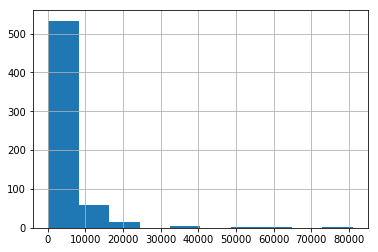

In [64]:
# Histogram of variable ApplicantIncome

data_train['ApplicantIncome'].hist()

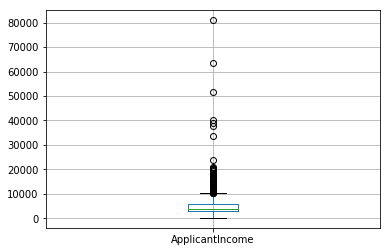

In [65]:
# Box Plot for variable ApplicantIncome of training data set

data_train.boxplot(column='ApplicantIncome')

 we see a lot of extreme values  or outliers in the income plot which describes the income disparity in the society.

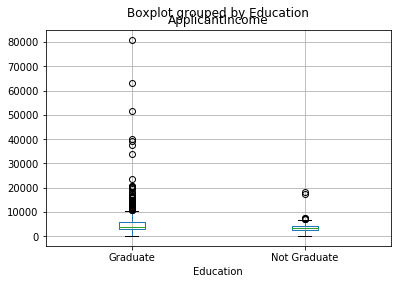

In [66]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

data_train.boxplot(column='ApplicantIncome', by = 'Education')

<ul>
    <li>Not much difeerence between mean income of graduates and non graduates</li>
    <li>there are higher number of graduates</li>
    <li>lots of outliers on graduates indicates high income</li>
    <li> there are few missing values of income</li>
    </ul>

#### understanding variable loan amount

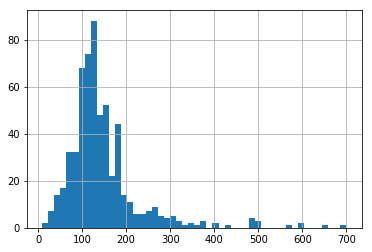

In [67]:
# Histogram of variable LoanAmount

data_train['LoanAmount'].hist(bins=50)

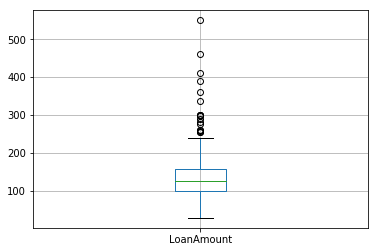

In [68]:
# Box Plot for variable LoanAmount of training data set

data_test.boxplot(column='LoanAmount')

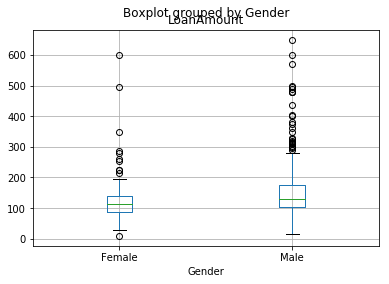

In [69]:
# Box Plot for variable LoanAmount by variable Gender of training data set

data_train.boxplot(column='LoanAmount', by = 'Gender')

Loan amount has much more missing values and extreme values as well

#  2A) DATA CLEANING

## Understanding distribution of categorical data

In [70]:
# Loan approval rates in absolute numbers
loan_approval = data_train['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


<ul>
    <li> 422 people have been granted loan</li>
    </ul>

In [71]:
# Credit History and Loan Status
pd.crosstab(data_train ['Credit_History'], data_train ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# Taking Observations

In [72]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [74]:
import seaborn as sns

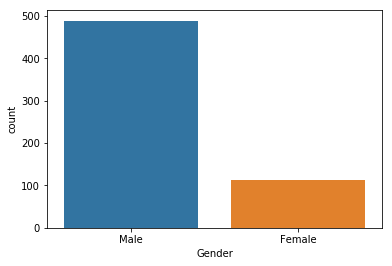

In [75]:
sns.countplot(data=data_train, x='Gender')
plt.show()

In [76]:
data_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

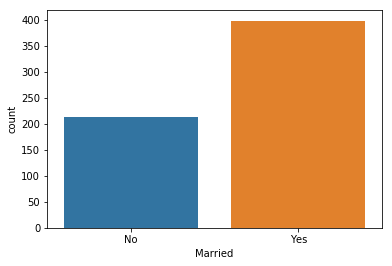

In [77]:
sns.countplot(data=data_train, x='Married')
plt.show()

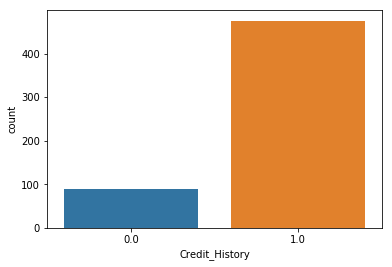

In [78]:
sns.countplot(data=data_train, x='Credit_History')
plt.show()

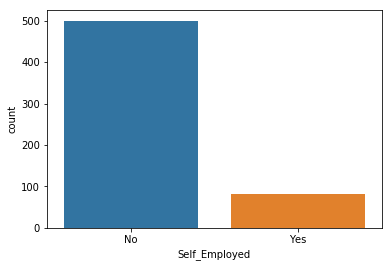

In [79]:
sns.countplot(data=data_train, x='Self_Employed')
plt.show()

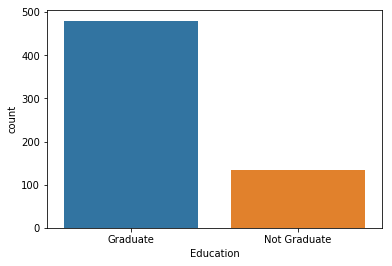

In [80]:
sns.countplot(data=data_train, x='Education')
plt.show()

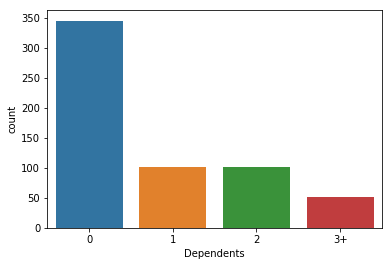

In [81]:
sns.countplot(data=data_train, x='Dependents')
plt.show()

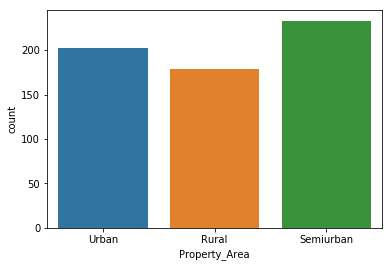

In [82]:
 sns.countplot(data=data_train, x='Property_Area')
plt.show()

Conclusions: (Through Single Variable Analysis)
<ul>
    
<li>We can see that approximately 81% are Male and 19% are female.</li>
<li>Percentage of applicants with no dependents is higher.</li>
<li>There are more number of graduates than non graduates.</li>
<li>Semi Urban people is slightly higher than Urban people among the applicants.</li>
<li>Larger Percentage of people have a good credit history.</li>
<li>The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.</li>
    </ul>

## 2B) Handling missing values

In [83]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
temp_df = data_train.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(data_train))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(data_train)}")
temp_df

The length of dataset is 	 614


,Column Name,Number of null values,Null values in percentage
0,Loan_ID,0,0.000000
1,Gender,13,2.117264
2,Married,3,0.488599
3,Dependents,15,2.442997
4,Education,0,0.000000
5,Self_Employed,32,5.211726
6,ApplicantIncome,0,0.000000
7,CoapplicantIncome,0,0.000000
8,LoanAmount,22,3.583062
9,Loan_Amount_Term,14,2.280130


In [85]:
# our target is loan status i.e yes or no whether loan is granted or not
def get_combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [86]:
combined = get_combined_data()
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [87]:
def impute_gender():
    global combined
    combined['Gender'].fillna('Male', inplace=True)

In [88]:
def impute_martial_status():
    global combined
    combined['Married'].fillna('Yes', inplace=True)

In [89]:
def impute_employment():
    global combined
    combined['Self_Employed'].fillna('No', inplace=True)

In [90]:
def impute_loan_amount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)

In [91]:
def impute_credit_history():
    global combined
    combined['Credit_History'].fillna(1, inplace=True)

In [92]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [93]:
def impute_dependents():
    global combined
    combined['Dependents'].fillna(combined['Dependents'].mode(),inplace=True)

In [94]:
def impute_LoanAmountTerm():
    global combined
    combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].mode(),inplace=True)

In [95]:
impute_gender()

In [96]:
impute_martial_status()

In [97]:
impute_employment()

In [98]:
impute_loan_amount()

In [99]:
impute_credit_history()

In [100]:
impute_dependents()

In [101]:
impute_LoanAmountTerm()

In [102]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

## 2C ) FEATURE ENGINEERING AND SCALING

In [104]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [105]:
def process_martial_status():
    global combined
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})

In [106]:
def process_dependents():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)

In [107]:
def process_education():
    global combined
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [108]:
def process_employment():
    global combined
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [109]:
def process_income():
    global combined
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [110]:
def process_loan_amount():
    global combined
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [111]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

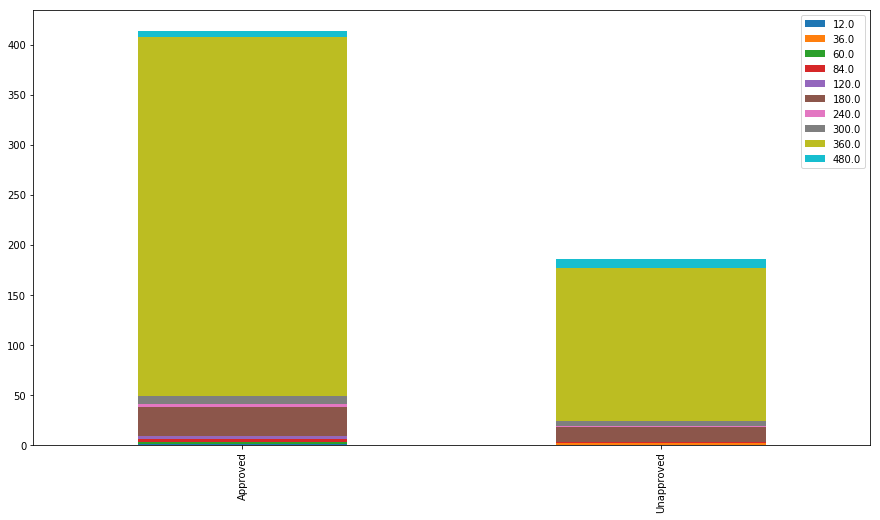

In [112]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [113]:
def process_loan_term():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [114]:
def process_credit_history():
    global combined
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
    combined.drop('Credit_History', axis=1, inplace=True)

In [115]:
def process_property():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop('Property_Area', axis=1, inplace=True)

In [116]:
process_gender()

In [117]:
process_martial_status()

In [118]:
process_dependents()

In [119]:
process_education()

In [120]:
process_employment()

In [121]:
process_income()

In [122]:
process_loan_amount()

In [123]:
process_loan_term()

In [124]:
process_credit_history()

In [125]:
process_property()

In [176]:
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
60,1,1,1,0,0.160637,0,0,0,0.061012,0.082855,0,0,0,1,0,1,0,0,0,1
61,1,1,1,0,0.130246,0,0,1,0.019948,0.040406,0,0,0,1,0,1,0,0,0,1
62,1,1,0,1,0.225760,0,0,0,0.058021,0.052283,0,0,1,0,1,0,0,1,0,0
63,1,1,1,0,0.169320,1,0,0,0.044031,0.057195,0,0,0,1,1,0,0,1,0,0
64,0,0,1,0,0.154848,0,0,0,0.034239,0.050728,0,0,0,1,1,0,0,0,1,0
65,1,1,1,0,0.360347,0,0,0,0.111604,0.058666,0,0,0,1,0,1,0,0,1,0
66,1,0,0,0,0.169320,0,0,0,0.050429,0.065036,0,0,1,0,1,0,0,0,0,1
67,1,1,1,0,0.438495,1,0,0,0.116996,0.047897,0,0,0,1,0,1,0,0,0,1
68,1,1,0,1,0.167873,0,0,1,0.071118,0.091266,1,0,0,0,0,1,0,0,0,1
69,0,0,1,0,0.183792,0,0,0,0.035923,0.042389,0,0,0,1,1,0,0,0,1,0


In [177]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [178]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [179]:
combined[200:210]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
200,1,1,0,0,0.117221,1,0,0,0.045979,0.091007,0,0,0,1,0,1,0,0,1,0
201,1,0,1,0,0.227207,0,1,0,0.043754,0.038583,0,0,0,1,1,0,0,0,1,0
202,1,1,0,0,0.169320,0,0,1,0.032052,0.042515,0,0,1,0,0,1,0,0,0,1
203,1,1,0,0,0.182344,1,0,0,0.039481,0.046913,0,0,0,1,0,1,0,0,0,1
204,1,1,0,0,0.166425,0,1,0,0.031109,0.042333,0,0,0,1,0,1,0,0,1,0
205,0,0,0,0,0.160637,0,0,0,0.037281,0.052318,0,0,0,1,0,1,0,0,1,0
206,0,0,1,0,0.102750,0,0,0,0.022650,0.059726,0,0,0,1,0,1,0,0,0,1
207,1,0,0,0,0.066570,0,0,0,0.063652,0.210614,0,0,0,1,0,1,0,1,0,0
208,1,0,1,0,0.072359,0,0,0,0.013035,0.062573,0,0,0,1,0,1,0,0,0,1
209,1,0,1,0,0.170767,0,0,0,0.024837,0.033259,0,0,0,1,0,1,0,0,1,0


#  3 MODEL BUILDING

#  3A) RANDOM FOREST CLASSIFIER

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [181]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [182]:
def recover_train_test_target():
    global combined, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [183]:
train, test, targets = recover_train_test_target()

In [184]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [185]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

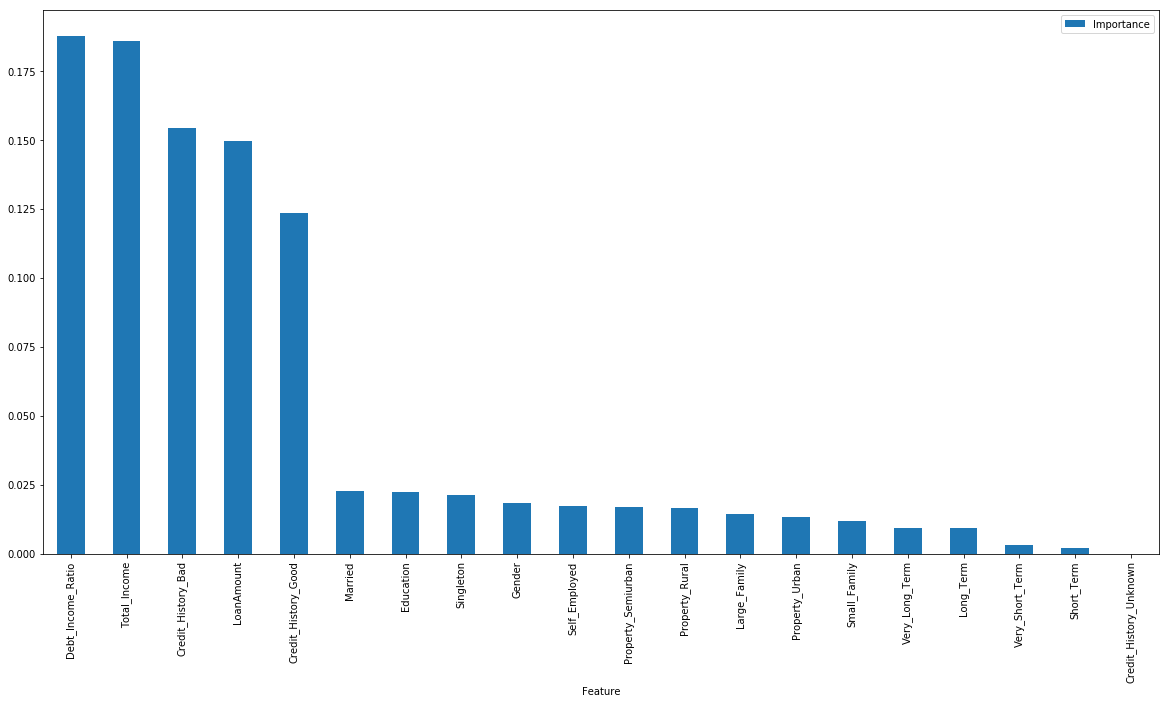

In [186]:
features.plot(kind='bar', figsize=(20, 10))

In [187]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [188]:
test_reduced = model.transform(test)
test_reduced.shape


(367, 5)

In [189]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth':6 }

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
compute_score(model, train, targets, scoring='accuracy')

0.8078794288736117

In [191]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

In [192]:
op = pd.read_csv('output.csv')

In [193]:
op.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


 ## ACCURACY SCORE(RANDOM FOREST) : 80.7%

## 3B) Logistic Regression

In [194]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']


for var in cat:
    le = preprocessing.LabelEncoder()
    data_train[var]=le.fit_transform(data_train[var].astype('str'))
data_train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status           object
dtype: object

In [222]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    #kf = KFold(data.shape[0], n_splits=5)
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data[predictors]):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [223]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
data_train['Type']='Train' 
data_test['Type']='Test'
fullData = pd.concat([data_train,data_test], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
Type                   0
dtype: int64

In [224]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [225]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
#fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

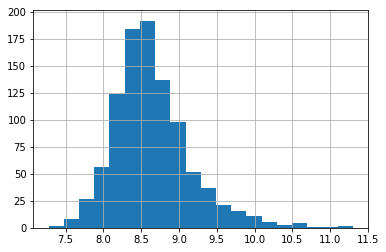

In [226]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [227]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))


##Logistic Regression Model
The chances of getting a loan will be higher for:
<ul>
    
<li>Applicants having a credit history (we observed this in exploration.)</li>
<li>Applicants with higher applicant and co-applicant incomes</li>
<li>Applicants with higher education level</li>
<li>Properties in urban areas with high growth perspectives</li>
</ul>
So let’s make our model with ‘Credit_History’, 'Education' & 'Gender'

In [228]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [229]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

#classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

In [230]:
classification_model(model,data_train,predictors_Logistic,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [231]:
op = pd.read_csv('Logistic_prediction.csv')

In [233]:
op.head(10)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
5,5,LP001054,Y
6,6,LP001055,Y
7,7,LP001056,N
8,8,LP001059,Y
9,9,LP001067,Y


# ACCURACY SCORE(LOGISTIC REGRESSION) : 80.95%